# Exercise 3

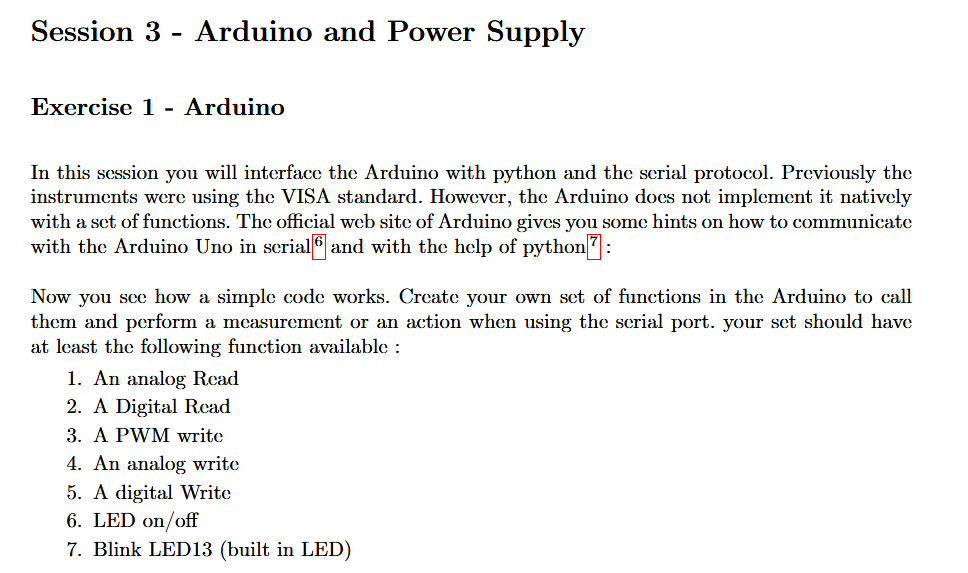

Tout d'abord ici:
- on oublie le générateur RIGOL
- L'oscilloscope
- VISA /SCPI

On doit travailler:
- arduino (uno ou nano)
- le port série (usb)
- python (pyserial)
- protocole de communication (mini-api entre arduino - python)

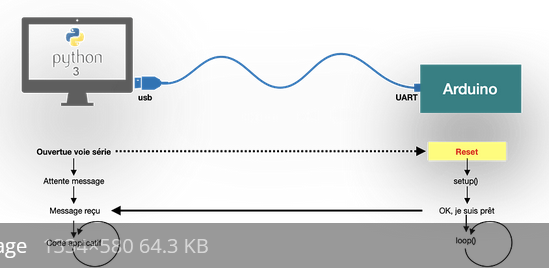


le but est de transformer l'arduino en instrument programmable, comme si c'était un RIGOL, mais en beaucoup plus simple.


1) Ecrire du code Arduino
- qui ecoute le port série (Serial.read)
- qui exécute une action selon la commande reçue
- qui renvoi une réponse à python (Serial.println())

2) Ecrire du code python 
- qui envoi des commandes via (pyserial)
- qui lit les réponses 
- exactement comme on fait avec VISA, mais maintenant on crées notre protocole.

3) ce qu'il faut avoir :

- 1 arduino Uno
- 1 câble USB
- enventuellement :
    - led + resistance
    - potentiomètre 
    - bouton poussoir 
    - un capteur analogique simple

- le code arduino de base 
---
```C++
void setup() {
  Serial.begin(9600);
  pinMode(13, OUTPUT);
}

void loop() {
  if (Serial.available()) {
    char c = Serial.read();

    if (c == 'A') { // analogRead A0
      int val = analogRead(A0);
      Serial.println(val);
    }

    if (c == 'D') { // digitalRead pin 7
      int val = digitalRead(7);
      Serial.println(val);
    }

    if (c == 'P') { // PWM write (pin 11)
      int value = Serial.parseInt();
      analogWrite(11, value);
    }

    if (c == 'W') { // digitalWrite
      int val = Serial.parseInt();
      digitalWrite(13, val);
    }

    if (c == 'L') {  // blink LED13
      digitalWrite(13, HIGH);
      delay(200);
      digitalWrite(13, LOW);
      delay(200);
      Serial.println("BLINK DONE");
    }
  }
}
```
---

``` “Create your own set of functions… at least: analog read, digital read, PWM write, analog write, digital write, LED on/off, blink LED13”. ```

- le code pyton: le but est de remplacer visa par pyserial
---
```python
import serial
import time

ser = serial.Serial("COM3", 9600, timeout=1)
time.sleep(2)  # laisser l'Arduino reset

# Analog read
ser.write(b"A")
print("A0 =", ser.readline().decode().strip())

# Digital read
ser.write(b"D")
print("Pin7 =", ser.readline().decode().strip())

# PWM write (value entre 0 et 255)
ser.write(b"P150\n")

# Digital write HIGH on LED13
ser.write(b"W1\n")

# Blink LED13
ser.write(b"L")
print(ser.readline().decode().strip())
```
---

Ce qui va se passer:

1) on connecte l'arduino au pc
2) on televerse le code arduino (menu-upload) et puis l'arduino commence à ecouter sur le port série (usb)
3) ensuite, on lance le pyton script
    - ouvrir le port usb/com
    - envoyer un commande 
    - attendre une réponse de l'arduino
    - python joue le role de generateur d'instruction et arduino exécute.

3) ce qu'on voit quand on lance le script python:
- si on fait ```analogRead``` : python afiche une valeur entre 0 et 1023.
- si on fait ```digitalRead```: python affiche une bool 1 ou 0
- si on fait ```PWM```: la LED sur la broche PWM s'allume plus ou moins
- si on fait ```digitalWrite```: la LED 13 s'allume ou s'eteint
- si on fait ```blink``` la LED 13 clignote + python imprime ```BLINK DONE```

In [38]:
import serial
import serial.tools.list_ports
ports = serial.tools.list_ports.comports()
print(ports)
for index,value in enumerate(sorted(ports)):
  print(index, '\t', value.name, '\t', value.manufacturer)

0 	 COM9 	 Microsoft


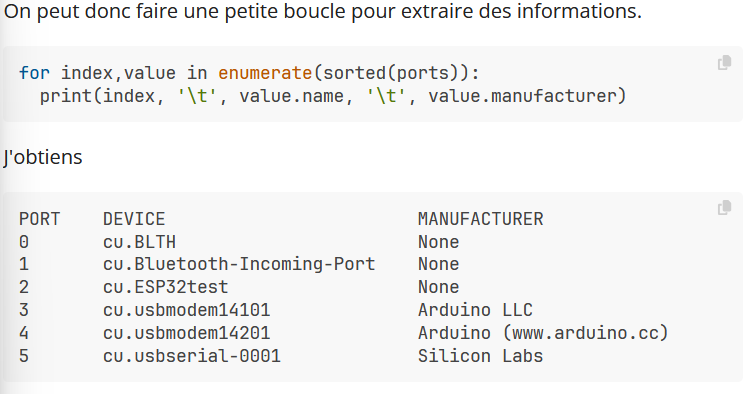

In [39]:
choices = []
print('PORT\tDEVICE\t\t\tMANUFACTURER')
for index,value in enumerate(sorted(ports)):
  if (value.hwid != 'n/a'):
    choices.append(index)
    print(index, '\t', value.name, '\t', value.manufacturer)

PORT	DEVICE			MANUFACTURER
0 	 COM9 	 Microsoft


In [ ]:
import serial
import serial.tools.list_ports
import time

# afficher les ports disponibles
ports = list(serial.tools.list_ports.comports())
print('Ports disponibles:')
for p in ports:
    print(' -', p.device, p.description)

PORT = "COM9"   # adapter si nécessaire
BAUD = 9600

try:
    ser = serial.Serial(PORT, BAUD, timeout=1)
except Exception as e:
    print('Impossible d\'ouvrir', PORT, ':', e)
    raise SystemExit(1)

print('Port ouvert, attente du reboot de l\'Arduino (2s)...')
time.sleep(2)

# Optionnel : envoyer une commande pour déclencher une réponse Arduino
# ser.write(b'A\\n')

print('Lecture pendant 5 secondes (si l\'Arduino envoie des lignes)...')
end = time.time() + 5
while time.time() < end:
    try:
        line = ser.readline()
        if line:
            print('>>', line.decode(errors="replace").strip())
    except Exception as e:
        print('Erreur lecture:', e)
        break

ser.close()
print('Fermé.')

Ports disponibles:
 - COM9 Périphérique série USB (COM9)
Impossible d'ouvrir COM9 : module 'serial' has no attribute 'Serial'


SystemExit: 1